# Linux, plotting classification performance

- dataset: `linux`
- task: _predict "bad" edits_
- models: _basic, dot and baselines_

**Goal**: plot the performance of various classifiers for the task of predicting bad edits.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.metrics import (
    precision_recall_curve, average_precision_score,
    roc_curve, roc_auc_score)

%matplotlib inline

In [2]:
from scipy.interpolate import interp1d
_xs = np.linspace(0.0, 1.0, num=200)

def plot_curves(y_true, y_pred, ax1, ax2, label):
    # Precision-recall.
    prec, rec, _ = precision_recall_curve(y_true, y_pred)
    auc = average_precision_score(y_true, y_pred)
    f = interp1d(rec, prec)
    ax1.plot(_xs, f(_xs), label="{} (AUC: {:.3f})".format(label, auc))
    # ROC.
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    f = interp1d(fpr, tpr)
    ax2.plot(_xs, f(_xs), label="{} (AUC: {:.3f})".format(label, auc))

## Load data

In [3]:
with open("../data/linux-baseline-ml-probs.txt", "r") as f:
    random_forest = [float(p.strip()) for p in f.readlines()]
    
with open("../data/linux-whitehill-probs.txt", "rb") as f:
    whitehill = [float(p.strip()) for p in f.readlines()]
    
with open("../data/linux-basic-probs.txt", "rb") as f:
    basic = [float(p.strip()) for p in f.readlines()]
    
with open("../data/linux-dot-probs.txt", "rb") as f:
    dot = [float(p.strip()) for p in f.readlines()]
    
with open("../data/linux-useronly-probs.txt", "rb") as f:
    useronly = [float(p.strip()) for p in f.readlines()]
    
with open("../data/linux-labels.txt", "rb") as f:
    y_true = [int(p.strip()) for p in f.readlines()]

## Plot

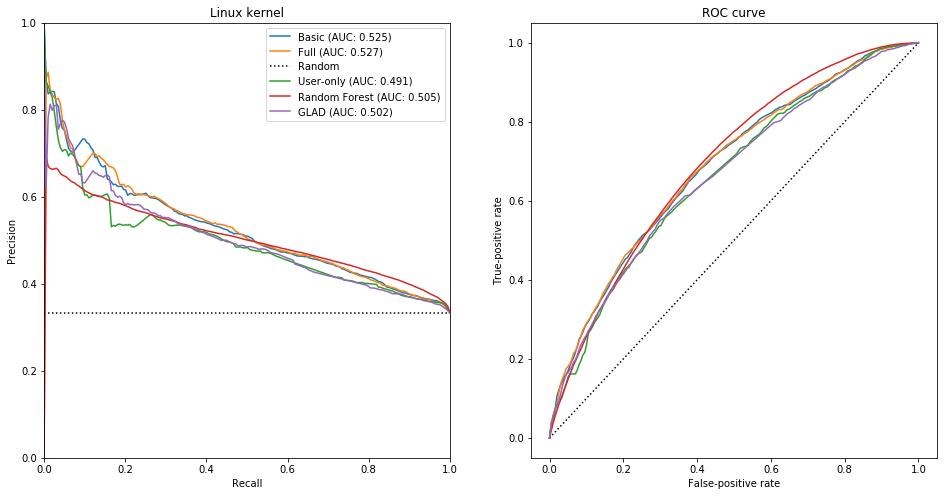

In [4]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16.0, 8.0))

preds = [basic, dot, None, useronly, random_forest, whitehill]
labels = ['Basic', 'Full', 
          'Random', 'User-only', 'Random Forest', 'GLAD']
colors = ['C0', 'C3', 'black', 'C2', 'C1', 'C4',]

for i in range(len(preds)):
    if labels[i] == 'Random':
        ax1.axhline(np.mean(y_true), label=labels[i], color=colors[i], ls=':')
        ax2.plot([0., 1.0], [0., 1.0], label="Random", color="k", ls=":")
    else:
        plot_curves(y_true, preds[i], ax1, ax2, labels[i])

        ax1.set_xlim(xmin=0.0, xmax=1.0)
ax1.set_ylim(ymin=0.0, ymax=1.0)
ax1.legend()
ax1.set_title("Linux kernel")
ax1.set_xlabel("Recall")
ax1.set_ylabel("Precision")
ax2.set_title("ROC curve")
ax2.set_xlabel("False-positive rate")
ax2.set_ylabel("True-positive rate")
plt.show()